**INTRODUCTION**
House rent depends on many factors like:
* size of property
* number of bathrooms, hall and kitchen
* the floor of the house
* area type
* area locality
* city
* furnishing status of the house

Using Machine Learning to build a house rent prediction system, data based on factors affecting rent of a house is needed. The data set used can be downloaded from [/kaggle/input/house-rent-prediction-dataset].

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


Start by importing the necessary python libraries and the [dataset](http:///kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

data=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


We can view the descriptive statistics of the dataset

In [3]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


From above the:
* mean rent of the houses is 34993.45
* median rent is 16000
* lowest rent is 1200
* highest rent is 3500000

Now, we can lool at the rent of the houses in different cities according to the number of bedrooms, halls and kitchens(BHK):

Text(0, 0.5, 'Rent')

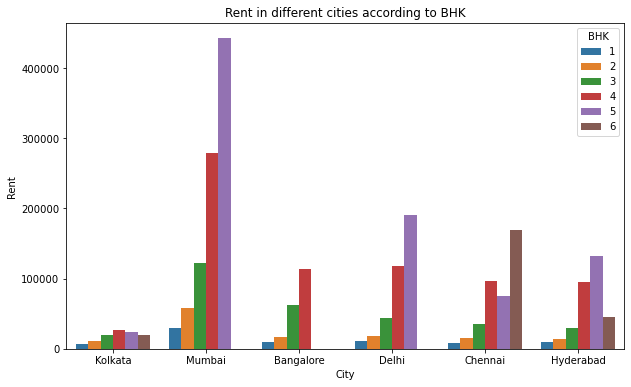

In [4]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Rent in different cities according to BHK")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['City'], y=data['Rent'], hue=data['BHK'], ci=None)

# Add label for vertical axis
plt.ylabel("Rent")

Now, we can also look at the rent of the houses in different cities according to the area type:

Text(0, 0.5, 'Rent')

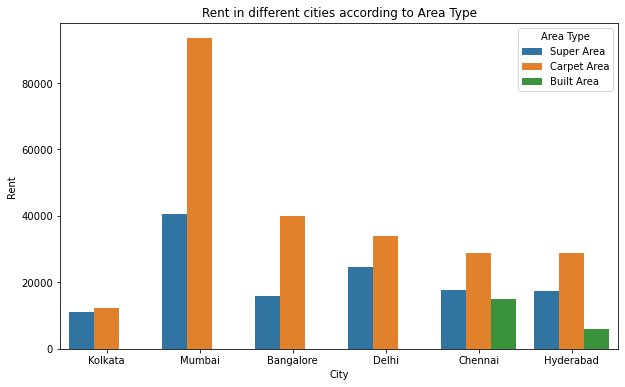

In [5]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Rent in different cities according to Area Type")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['City'], y=data['Rent'], hue=data['Area Type'], ci=None)

# Add label for vertical axis
plt.ylabel("Rent")

Let's also look at the rent of the houses in different cities according to the furnishing status of the house:

Text(0, 0.5, 'Rent')

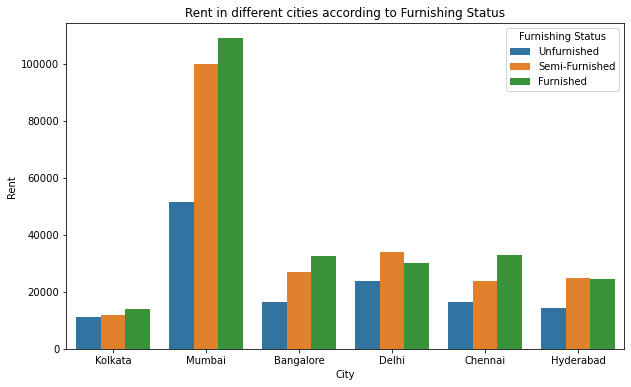

In [6]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Rent in different cities according to Furnishing Status")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['City'], y=data['Rent'], hue=data['Furnishing Status'], ci=None)

# Add label for vertical axis
plt.ylabel("Rent")

Finally let's also look at the rent of the houses in different cities according to the furnishing size of the house:

In [7]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

figure=px.bar(data, x=data['City'],
             y=data['Rent'],
             color=data['Size'],
             title='Rent in different cities according to size')
figure.show()

Next we will llok at the number of housesavailable for rent in different cities:

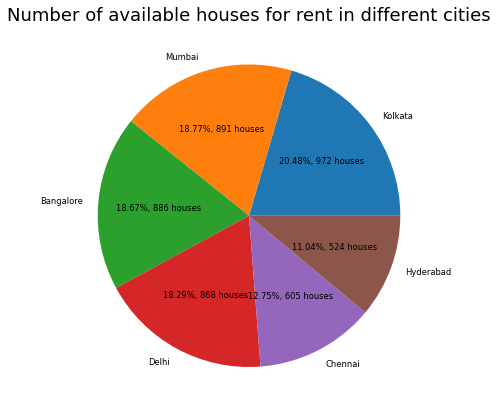

In [8]:
cities=data['City'].unique()
x=data['City'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))


ax.pie(x, labels = cities, autopct= lambda p:f'{p:.2f}%, {p*sum(x)/100 :.0f} houses',
       textprops={'size': 'small'})
ax.set_title('Number of available houses for rent in different cities', fontsize=18)
plt.tight_layout()

Finally, we can look at the type of tenants preferred in the available houses:

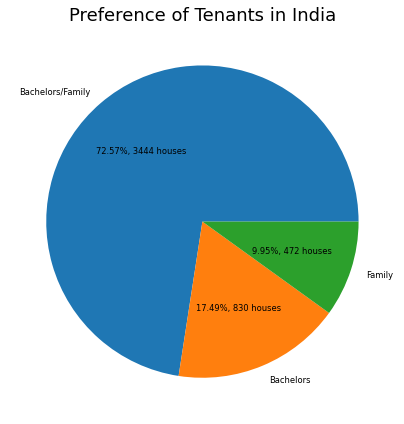

In [9]:
cities=data['Tenant Preferred'].unique()
x=data['Tenant Preferred'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))


ax.pie(x, labels = cities, autopct= lambda p:f'{p:.2f}%, {p*sum(x)/100 :.0f} houses',
       textprops={'size': 'small'})
ax.set_title('Preference of Tenants in India', fontsize=18)
plt.tight_layout()

In [10]:
#Remove useless Columns
data.drop(['Posted On', 'Area Locality','Floor'], 
          axis='columns', inplace=True)
data

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


**House Rent Prediction Model**

First we will convert all the categorial features into numerical features needed to train a house rent prediction model.

In [11]:
#Encoding Categorical Data
rent_data = data.join(pd.get_dummies(data[['Area Type','City','Furnishing Status',
                                 'Tenant Preferred','Point of Contact']],
                             drop_first=True))
rent_data.drop(columns = ['Area Type','City','Furnishing Status',
                    'Tenant Preferred','Point of Contact'], 
         inplace = True)
rent_data.dtypes
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


We will select the target(y) and the columns
(x) corresponding to features and then split the data into training and validation sets. finally, we will define a random forest model.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

X=rent_data.drop('Rent', axis=1)
y=rent_data['Rent']

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
Xtrain=ss.fit_transform(Xtrain)
Xtest=ss.transform(Xtest)

#Random Forest Regression Model
random_forest_model=RandomForestRegressor()
random_forest_model.fit(Xtrain,ytrain)
print("Random Forest Training Accuracy:", random_forest_model.score(Xtrain,ytrain))
print("Random Forest Testing Accuracy:", random_forest_model.score(Xtest,ytest))

Random Forest Training Accuracy: 0.8376189098328586
Random Forest Testing Accuracy: 0.45735311044066096


In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Evaluating the random forest model
def evaluate(model):
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    
    print('MAE:', mean_absolute_error(ytest, pred))
    print('RMSE:', np.sqrt(mean_squared_error(ytest, pred)))
    print('R2 Score:', r2_score(ytest, pred))
    
evaluate(RandomForestRegressor())

MAE: 13785.86603950855
RMSE: 46792.6905619994
R2 Score: 0.45060316296557823
